In [3]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt

Remember the magic.

In [4]:
%matplotlib inline

## Filtering

Load counties shapefile

In [5]:
counties = gpd.read_file`("../output/counties_simple/counties_simple.shp")

Take a look

In [6]:
counties.head(1)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((246290.0411551894 -328619.667039162,..."


Filter for California. We don't have the state name but we can use the state fips code. California's is `06`.

Basic Pandas filtering works here. You simply pass a conditional test inside hard hard brackets. 

Typically your conditional tests a single column value using the same hard bracket notation (yes, it's not just you, this is a confusing thing about Pandas). So to test a single column your conditional would look like:

    `DataFrame['COLUMN_NAME'] == VALUE`
  
And then you pass that conditional inside another set of hard brackets against the DataFrame.

    `DataFrame[ DataFrame['COLUMN_NAME'] == VALUE ]`

Yes, you awkwardly have to type the name of the DataFrame twice. That's just how the DataFrame crumbles.

In [7]:
ca = counties[ counties['STATEFP'] == '06']


Test our work

In [9]:
len(counties) - len(ca)

3050

Visually inspect

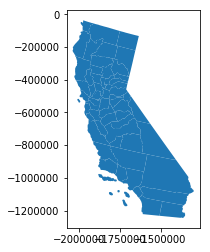

In [11]:
ca.plot()

Yeah looks like all the counties are there. Onwards.

## Layering plots

Load up the states file

In [5]:
states = gpd.read_file("../output/states_simple/")
states.head(3)

,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,54,01779805,54,WV,West Virginia,00,62266474513,489028543,+38.6472854,-080.6183274,POLYGON ((1561571.961498005 -483477.9709532264...
1,12,00294478,12,FL,Florida,00,138949136250,31361101223,+28.4574302,-082.4091477,(POLYGON ((1300534.537687921 -1450505.84259490...
2,17,01779784,17,IL,Illinois,00,143780567633,6214824948,+40.1028754,-089.1526108,POLYGON ((742564.4861695889 -445238.1828612213...


Load up the locations of in-n-outs

In [6]:
innout = gpd.read_file("../output/innout/")
innout.head(3)

,address,city,latitude,longitude,state,store_numb,geometry
0,555 Willie Stargell Ave.,Alameda,37.783793,-122.277219,CA,303,POINT (-1932912.063555679 -541297.1056705904)
1,1210 N. Atlantic Blvd.,Alhambra,34.105994,-118.134390,CA,121,POINT (-1661571.27672258 -1031006.481200234)
2,190 E. Stacy Rd.,Allen,33.126701,-96.659140,TX,255,POINT (312686.4695683446 -1311776.231833021)


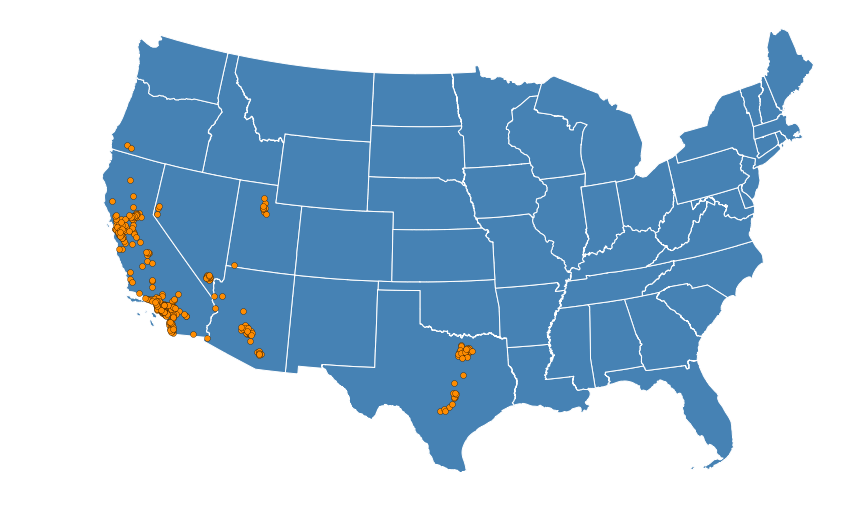

In [7]:
fig, ax = plt.subplots( figsize = (16, 9) )

ax = states.plot(
    ax = ax,
    linewidth = 1,
    edgecolor = "white",
    color = "steelblue"
)

innout.plot(
    ax = ax,
    color = "darkorange",
    edgecolor = "black",
    linewidth = 0.3,
    markersize = 35
)

ax.axis("off");


California only

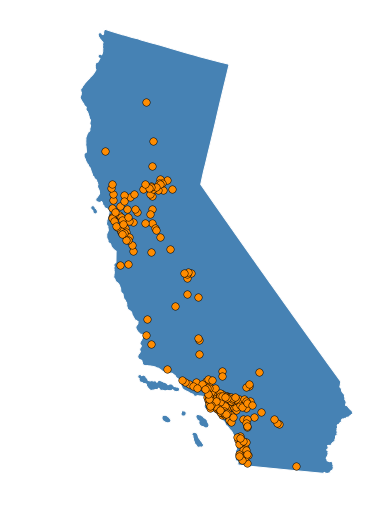

In [8]:
fig, ax = plt.subplots( figsize = (16, 9) )

california = states[ states["STUSPS"] == "CA"]

ax = california.plot(
    ax = ax,
    linewidth = 1,
    edgecolor = "white",
    color = "steelblue"
)

ca_innouts = innout[ innout["state"] == "CA"]

ca_innouts.plot(
    ax = ax,
    color = "darkorange",
    edgecolor = "black",
    linewidth = 0.5,
    markersize = 55
)

ax.axis("off");


## Advanced map aesthetics

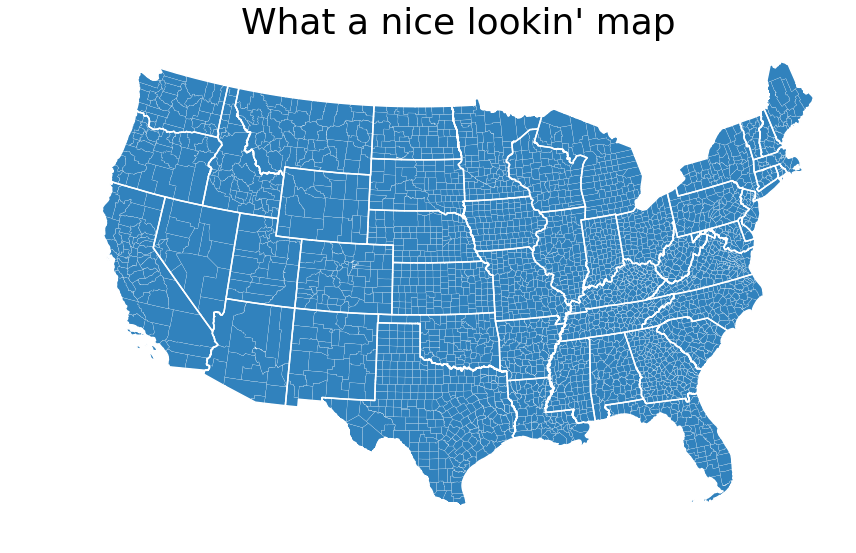

In [9]:
ax = counties.plot(
    figsize = (16, 9),
    color = "#3182bd",
    linewidth = 0.15,
    edgecolor = "white"
)

states.plot(
    ax = ax,
    linewidth = 1.5,
    edgecolor = "white",
    color = "None"
)

ax.axis("off");

ax.set_title(
    "What a nice lookin' map", 
    fontsize = 36
);

## Joining data

Load up opioid prescription data

In [10]:
prescribing = pd.read_csv("../data/cdc_opioid_prescribing.csv", dtype = {
    "fips": str,
    "rate_per_100": float 
})

prescribing.head(3)

,county,state,fips,rate_per_100
0,AUTAUGA,AL,01001,106.6
1,BALDWIN,AL,01003,106.7
2,BARBOUR,AL,01005,90.7


Look at the counties file

In [11]:
counties.head(3)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((246290.0411551894 -328619.667039162,..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,680956809,61588406,+46.2946377,-123.4244583,POLYGON ((-1770686.983550074 398793.6640856052...
2,35,011,00933054,35011,De Baca,De Baca County,6016819484,29089486,+34.3592729,-104.3686961,POLYGON ((-422754.4474200015 -1210188.44889264...


We'll merge on the fips codes. But our census data splits the state and county fips. Let's merge them.

In [12]:
counties['fips'] = (counties['STATEFP'] + counties['COUNTYFP'])
counties.head(1)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,fips
0,31,039,00835841,31039,Cuming,Cuming County,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((246290.0411551894 -328619.667039162,...",31039


Merge with pandas

In [13]:
joined = counties.merge(prescribing, on="fips", how = "left")

In [14]:
joined.head(3)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,fips,county,state,rate_per_100
0,31,039,00835841,31039,Cuming,Cuming County,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((246290.0411551894 -328619.667039162,...",31039,CUMING,NE,25.5
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,680956809,61588406,+46.2946377,-123.4244583,POLYGON ((-1770686.983550074 398793.6640856052...,53069,WAHKIAKUM,WA,5.8
2,35,011,00933054,35011,De Baca,De Baca County,6016819484,29089486,+34.3592729,-104.3686961,POLYGON ((-422754.4474200015 -1210188.44889264...,35011,DE BACA,NM,6.8


Plot quickly

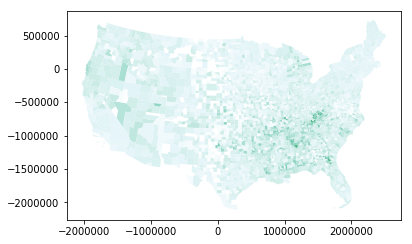

In [15]:
joined['rate_per_100'] = pd.to_numeric(joined['rate_per_100'])

joined.dropna().plot(
    column = "rate_per_100",
    cmap = "BuGn"
);

Make it pretty

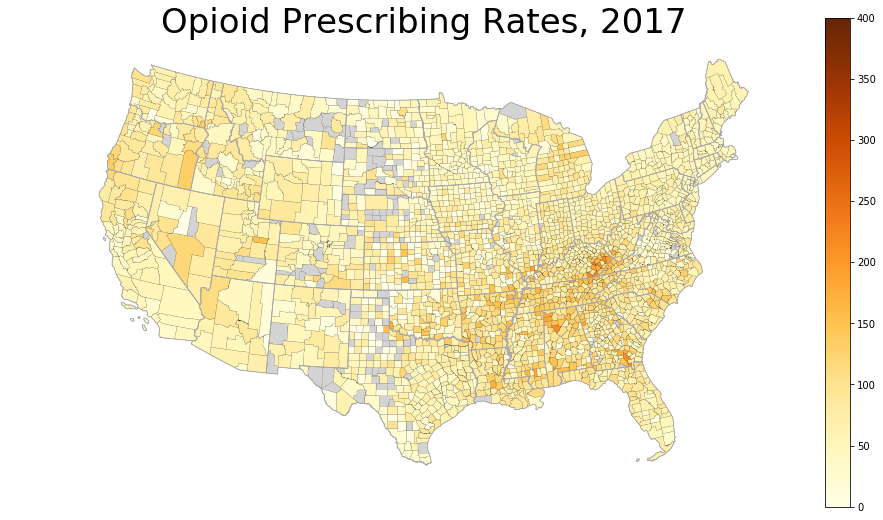

In [16]:
fig, ax = plt.subplots( figsize = (16, 9) )


# first plot all counties in gray
joined.plot(
    ax = ax,
    color = "lightgray",
    edgecolor = "black",
    linewidth = 0.1
)

# plot only the counties with data
joined.dropna().plot(
    ax = ax,
    column = "rate_per_100",
    vmin = 0,
    vmax = 400,
    cmap = "YlOrBr",
    edgecolor = "black",
    linewidth = 0.1,
    legend = True
)

# finally, the state outlines
states.plot(
    ax = ax,
    edgecolor = "darkgray",
    linewidth = 0.8,
    color = "None"
)

ax.set_title("Opioid Prescribing Rates, 2017", fontsize = 34)
ax.axis("off");

#fig.save

Save to file

In [17]:
fig.savefig(
    "../output/opioids.png", 
    transparent = False,
    bbox_inches = "tight"
)